In [ ]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/drive/MyDrive/CatClassifier/train'

In [ ]:
train_datagen = ImageDataGenerator(validation_split=0.2,rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    subset='training',
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    subset='validation',
    class_mode='binary'
)


Found 20001 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


0
1.0


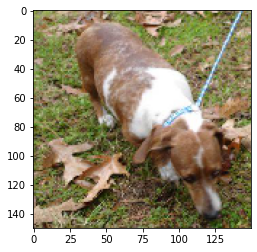

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
for idx,data in enumerate(train_generator):
    if idx == 1 : break
    print(idx)
    X, y = data
    foo = X[0]
    plt.imshow(foo)
    print(y[0])

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras import layers

In [ ]:
model = keras.models.Sequential([

    # Conv layers
    layers.Input(shape=(150,150,3)),
    layers.Conv2D(16, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(2),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(2),
    # FC layers
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=0.001), loss= 'binary_crossentropy', metrics=['acc'])

In [ ]:
hist = model.fit_generator(train_generator,
                 steps_per_epoch=100, 
                 epochs = 15 , 
                 validation_data=validation_generator ,
                 validation_steps=50 ,
                 verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 [==============================] - 1439s 14s/step - loss: 0.9343 - acc: 0.5265 - val_loss: 0.6672 - val_acc: 0.6290
Epoch 2/15
100/100 [==============================] - 1209s 12s/step - loss: 0.6798 - acc: 0.5880 - val_loss: 0.6193 - val_acc: 0.6650
Epoch 3/15
100/100 [==============================] - 1048s 10s/step - loss: 0.6325 - acc: 0.6391 - val_loss: 0.5798 - val_acc: 0.6920
Epoch 4/15
100/100 [==============================] - 926s 9s/step - loss: 0.5818 - acc: 0.6967 - val_loss: 0.5309 - val_acc: 0.7440
Epoch 5/15
100/100 [==============================] - 816s 8s/step - loss: 0.5534 - acc: 0.7113 - val_loss: 0.5605 - val_acc: 0.7230
Epoch 6/15
100/100 [==============================] - 730s 7s/step - loss: 0.5592 - acc: 0.7280 - val_loss: 0.5152 - val_acc: 0.7430
Epoch 7/15
100/100 [==============================] - 613s 6s/step - loss: 0.5235 - acc: 0.7483 - val_loss: 0.5144 - val_acc: 0.7450
Epoch 8/15
100/100 [==============================] - 549s 6s/s

In [ ]:
model_json = model.to_json()

In [ ]:
with open('CatAndDogClassifier_ver_0.0.json', 'w') as json_file:
    json_file.write(model_json)

In [ ]:
model.save_weights('CatAndDogClassifier_ver_0.0.h5')
print('Saved model to disk')

Saved model to disk


In [ ]:
model.save('/content/drive/MyDrive/CatClassifier/ver0')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/CatClassifier/ver0/assets


In [ ]:
model.save('/content/drive/MyDrive/CatClassifier/ver0_h5version.h5')